In [197]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np 
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from string import punctuation
nltk.download("stopwords")
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from pymystem3 import Mystem
from datetime import datetime
import functools
import operator

[nltk_data] Downloading package stopwords to /home/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [237]:
df = pd.read_csv("fb.csv", index_col=0)

In [238]:
df

,time,post,number_comments,comment
0,2020-10-01,Коллеги! Размещаю видео с судебным юристом Тат...,9,"[', спасибо, из за очепятки я прочитала аккуль..."
1,2020-10-05,"Коллеги, клиент не спросив оплатил проверку 19...",2,['документы и регистрировать через регистратор...
2,2020-10-05,Приплыло. Сделка цепь. Нижний просит заложить ...,5,['ИтакаСоглашайтесь на их оценщика . Ссылку пр...
3,2020-10-05,"Коллеги, добрый день! Нужна помощь)) нужны фот...",52,"['ты уже и в Америке работаешь, Наташ?', 'Лурь..."
4,2020-10-05,"Время сейчас такое, что иногда приходят два по...",10,"['распашонка?', 'Лукашевская, да', 'банк?', 'Б..."
...,...,...,...,...
107,2020-10-01,"Уважаемые коллеги, поделитесь пожалуйста опыто...",0,[]
108,2020-10-01,"Уважаемы, коллеги, кто как поступил бы в этой ...",0,[]
109,2019-10-31,"Пост благодарности Серебряков Андрей, или «не...",0,[]
110,2020-10-01,"А нет ли среди вас волшебников, которые смогли...",0,[]


In [239]:
##########TIME#######################
for i in range(len(df)):
    df['time'][i] = datetime.strptime(df["time"][i], '%Y-%m-%d')
#########COMMENTS#####################
for i in range(len(df)):
    df["comment"][i] = list(df["comment"][i][2:-2].replace("'", '').split(','))
tw = TweetTokenizer()
det = TreebankWordDetokenizer()
noise = stopwords.words('russian') + list(punctuation)
upnoise = [letter.upper() for letter in noise]
sum_noise = noise+upnoise+['.','»','«', 'Коллега', "коллега", "это", "который", "свой"]
for i in tqdm(range(len(df))):
    for j in range(len(df["comment"][i])):
        tokenized_example = (tw.tokenize(df["comment"][i][j]))
        filtered_example = [word for word in tokenized_example if not word in sum_noise]
        df["comment"][i][j] = det.detokenize(filtered_example)
mystem_analyzer = Mystem(entire_input=False)
for i in tqdm(range(len(df))):
    df["comment"][i] = [mystem_analyzer.lemmatize(w) for w in df["comment"][i]]
    df["comment"][i] = list(filter(None, df["comment"][i]))

    
##########POSTS##############
for i in tqdm(range(len(df))):
        tokenized_example = (tw.tokenize(df["post"][i]))
        filtered_example = [word for word in tokenized_example if not word in sum_noise]
        df["post"][i] = det.detokenize(filtered_example)
for i in tqdm(range(len(df))):
    a = []
    a.append(df['post'][i])
    df["post"][i] = a
for i in tqdm(range(len(df))):
    df["post"][i] = [mystem_analyzer.lemmatize(w) for w in df["post"][i]][0]
    
df

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  0%|          | 0/112 [00:00<?, ?it/s]/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,time,post,number_comments,comment
0,2020-10-01 00:00:00,"[коллега, размещать, видео, судебный, юрист, т...",9,"[[спасибо], [очепятка, прочитывать, аккультный..."
1,2020-10-05 00:00:00,"[коллега, клиент, спрашивать, оплачивать, пров...",2,"[[документ, регистрировать, регистратор], [ден..."
2,2020-10-05 00:00:00,"[приплывать, сделка, цепь, нижний, просить, за...",5,"[[итакасоглашаться, оценщик, ссылка, присылать..."
3,2020-10-05 00:00:00,"[коллега, добрый, день, нужный, помощь, нужный...",52,"[[америка, работать], [наташа], [лурье], [вспо..."
4,2020-10-05 00:00:00,"[время, такой, приходить, покупатель, квартира...",10,"[[распашонка], [лукашевский], [банк], [быков],..."
...,...,...,...,...
107,2020-10-01 00:00:00,"[уважаемый, коллега, поделиться, пожалуйста, о...",0,[]
108,2020-10-01 00:00:00,"[уважаемый, коллега, поступать, ситуация, стоя...",0,[]
109,2019-10-31 00:00:00,"[пост, благодарность, серебряков, андрей, имет...",0,[]
110,2020-10-01 00:00:00,"[среди, волшебник, который, смочь, срочно, пре...",0,[]


In [231]:
def avg_datetime(series):
    return (series - series.min()).mean() + series.min()


In [218]:
class TextAnalyzer:
    def __init__(self, df):
        self.df = df
    def frequency(self,  numb, text_type, start_date = None, end_date = None, draw=True):
        #start&end date = [d, m ,y]
        self.numb = numb
        self.wordcount = {}
        self.text_type = text_type
        self.draw = draw
        self.start_date = start_date
        self.end_date = end_date
        if self.start_date == None and self.end_date == None:
            self.df1 = self.df
        elif (not self.start_date == None ) and self.end_date==None:
            self.start_date = datetime(self.start_date[2], self.start_date[1], self.start_date[0], 0, 0)
            self.end_date = datetime(self.end_date[2], self.end_date[1], self.end_date[0], 0, 0)
        if self.text_type == 'comment':
            for i in range(len(self.df1)):
                for j in range(len(self.df1['comment'][i])):
                    for word in (self.df1['comment'][i][j]):
                        word = word.replace(".","")
                        word = word.replace(",","")
                        word = word.replace(":","")
                        word = word.replace("\"","")
                        word = word.replace("!","")
                        word = word.replace("â€œ","")
                        word = word.replace("â€˜","")
                        word = word.replace("*","")
                        if word not in sum_noise:
                            if word not in self.wordcount:
                                self.wordcount[word] = 1
                            else:
                                self.wordcount[word] += 1
        if self.text_type == 'post':
            for i in range(len(self.df1)):   
                for word in self.df1['post'][i]:
                    word = word.replace(".","")
                    word = word.replace(",","")
                    word = word.replace(":","")
                    word = word.replace("\"","")
                    word = word.replace("!","")
                    word = word.replace("â€œ","")
                    word = word.replace("â€˜","")
                    word = word.replace("*","")
                    if word not in sum_noise:
                        if word not in self.wordcount:
                            self.wordcount[word] = 1
                        else:
                            self.wordcount[word] += 1
        print("The {} most common words are as follows\n".format(self.numb))
        self.word_counter = collections.Counter(self.wordcount)
        for word, count in self.word_counter.most_common(self.numb):
            print(word, ": ", count)
        if self.draw:
            lst = self.word_counter.most_common(self.numb)
            df_cnt = pd.DataFrame(lst, columns = ['Word', 'Count'])
            df_cnt.plot.bar(x='Word',y='Count')

In [219]:
test = TextAnalyzer(df)

In [241]:
test.wordcount

{'спасибо': 62,
 'очепятка': 1,
 'прочитывать': 7,
 'аккультный': 1,
 'чубатова': 1,
 'исправлять': 6,
 'большой': 36,
 'привет': 4,
 'сто': 4,
 'год': 124,
 'слышать': 10,
 'вихлянцев': 1,
 'передавать': 25,
 'общаться': 5,
 'плотно': 1,
 'бухтояров': 30,
 'youtu': 4,
 'be': 5,
 'YWNcfSyFzeE': 1,
 'бухтоярова': 9,
 'ждать': 17,
 'новый': 52,
 'ссылка': 9,
 'интервью': 2,
 'татьяна': 4,
 'увидеть': 19,
 'первый': 43,
 'сделка': 181,
 'славов': 2,
 'обязательно': 22,
 'документ': 71,
 'регистрировать': 7,
 'регистратор': 16,
 'деньги': 84,
 'ооо': 4,
 'зависать': 2,
 'итакасоглашаться': 1,
 'оценщик': 3,
 'присылать': 12,
 'выезд': 1,
 'тыс': 2,
 'гарантированный': 1,
 'одобрять': 4,
 'делать': 86,
 'оценка': 12,
 'р': 7,
 'Kraevskaya': 2,
 'Grigoryants': 2,
 'понятно': 16,
 'сбербанк': 18,
 'окрылять': 1,
 'тен': 4,
 'предупреждать': 11,
 'клиент': 133,
 'впаривать': 1,
 'общедоступный': 1,
 'бесплатный': 7,
 'информация': 30,
 'тысяча': 6,
 'сколько': 22,
 'человек': 109,
 'вестись': 

In [240]:
df[df['time']<datetime(2020, 10, 5, 0, 0)]

,time,post,number_comments,comment
0,2020-10-01 00:00:00,"[коллега, размещать, видео, судебный, юрист, т...",9,"[[спасибо], [очепятка, прочитывать, аккультный..."
8,2020-10-04 00:00:00,"[домклик, забанить, объявление, причина, невоз...",23,"[[выбор, собственник, собачий, бега, риелтор],..."
11,2020-10-04 00:00:00,"[вы, какой, соотношение, исходить, входящий, к...",27,"[[курилко, колит, неприятный, штука], [терлецк..."
12,2020-10-01 00:00:00,"[проактивный, реактивный, принцип, работа, рие...",16,"[[нью, йорк, один, банк, туалет, клиент], [Bei..."
15,2020-10-02 00:00:00,"[передавать, пожалуйста, герман, оскарович, ци...",3,"[[терлецкая, скоро], [другой, регион, нужный, ..."
...,...,...,...,...
107,2020-10-01 00:00:00,"[уважаемый, коллега, поделиться, пожалуйста, о...",0,[]
108,2020-10-01 00:00:00,"[уважаемый, коллега, поступать, ситуация, стоя...",0,[]
109,2019-10-31 00:00:00,"[пост, благодарность, серебряков, андрей, имет...",0,[]
110,2020-10-01 00:00:00,"[среди, волшебник, который, смочь, срочно, пре...",0,[]


In [224]:
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for i in range(len(df)):   
    for word in df['post'][i]:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in sum_noise:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

In [225]:
wordcount

{'размещать': 3,
 'видео': 2,
 'судебный': 3,
 'юрист': 8,
 'татьяна': 1,
 'пак': 1,
 'поговорить': 1,
 'процедура': 2,
 'банкротство': 2,
 'физический': 1,
 'лицо': 1,
 'посмотреть': 4,
 'именно': 2,
 'глаз': 2,
 'заниматься': 4,
 'надеяться': 3,
 'интересный': 4,
 'ссылка': 3,
 'первый': 5,
 'комментарий': 1,
 'пост': 4,
 'тема': 1,
 'актуальный': 1,
 'возникать': 5,
 'вопрос': 15,
 'риэлтор': 9,
 'особенно': 1,
 'защищать': 1,
 'покупатель': 14,
 'законобанкротствефизическихлица': 1,
 'обучениериэлтор': 1,
 'юристпонедвижимость': 1,
 'клиент': 13,
 'спрашивать': 4,
 'оплачивать': 2,
 'проверка': 4,
 'сбера': 3,
 'якобы': 1,
 'надежно': 1,
 'кабинет': 4,
 'висеть': 2,
 'красный': 2,
 'замечание': 1,
 'отчет': 2,
 'оценка': 8,
 'объект': 10,
 'витрина': 1,
 'пропадать': 1,
 'делать': 5,
 'приходиться': 1,
 'обходиться': 1,
 'приплывать': 1,
 'сделка': 27,
 'цепь': 2,
 'нижний': 1,
 'просить': 7,
 'закладывать': 2,
 'доллар': 1,
 'добрый': 13,
 'день': 24,
 'нужный': 8,
 'помощь': 8,
 

How many most common words to print: 10

OK. The 10 most common words are as follows

квартира :  278
сделка :  181
право :  150
ребенок :  142
клиент :  133
год :  124
покупатель :  120
мочь :  120
человек :  109
продавец :  100


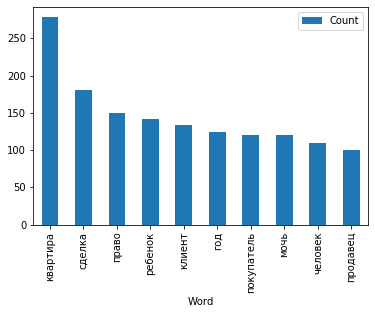

In [173]:

# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df_cnt = pd.DataFrame(lst, columns = ['Word', 'Count'])
df_cnt.plot.bar(x='Word',y='Count')